# Why don't we use the classification error as a metric to grow a decision tree?

<IPython.core.display.Javascript object>


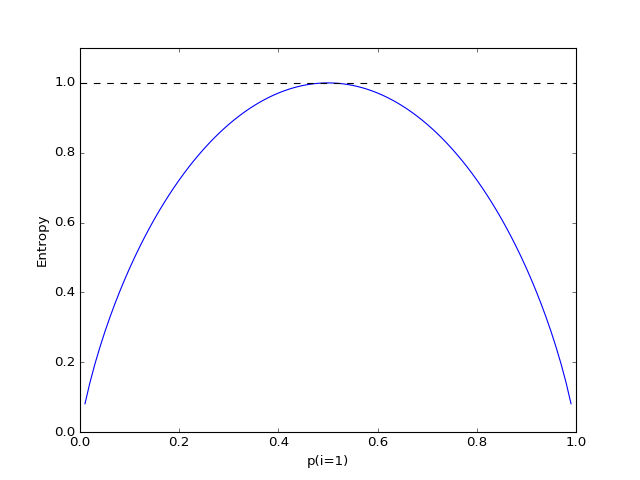

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.show()

In [14]:

import numpy as np
import matplotlib.pyplot as plt


def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.plot(x, ent)
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
e0 = entropy(40/120)
e1 = entropy(28/70)
e2 = entropy(12/50)
plt.plot([28/70, 12/50], [e1, e2], marker='s', linestyle='--',  markersize=10)
plt.plot([(40/120)], [e0 ], marker='^', markersize=7)
plt.plot([(70/120 * 28/70 + 50/120 * 12/50)], [(70/120 * e1 + 50/120 * e2) ], marker='o', markersize=7) 
plt.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylabel('Entropy')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


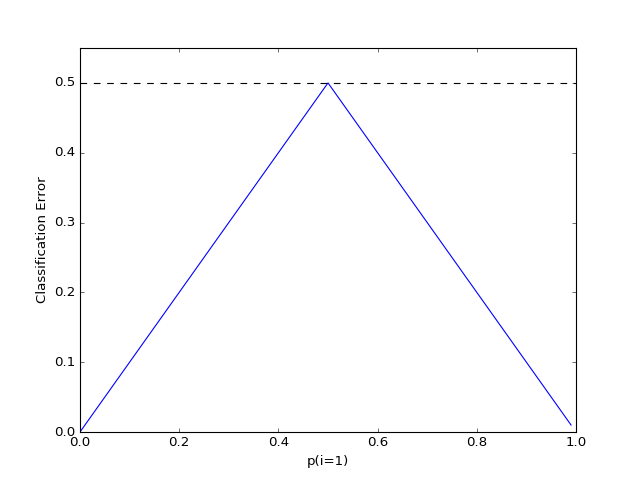

In [4]:
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
err = [error(i) for i in x]
plt.plot(x, err)
plt.ylim([0,0.55])
plt.xlabel('p(i=1)')
plt.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
plt.ylabel('Classification Error')
plt.show()

$$IG(D_{p}, x_i) = I(D_{p}) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})$$

- $IG$: Information Gain
- $x_i$: feature to perform the split
- $N_p$: number of samples in the parent node
- $N_{left}$: number of samples in the left child node
- $N_{right}$: number of samples in the right child node
- $I$: impurity
- $D_p$: training subset of the parent node
- $D_{left}$: training subset of the left child node
- $D_right$: training subset of the right child node

$$I_H(t) = - \sum_{i =1}^{C} p(i \mid t) \;log_2 \,p(i \mid t)$$

for all non-empty classed $p(i \mid t) \neq 0$, where $p(i \mid t)$ is the proportion (or frequency or probability) of the samples that belong to class *i* for a particular node *t*; *C* is the number of unique class labels.

$$I_E(t) =  1 - max\{{p_i}\}$$